<a href="https://colab.research.google.com/github/lahirumenik/ML-learning/blob/main/titanic-survival/titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('titanic.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
survived_df = titanic_df[titanic_df['Survived']==1]
no_survived_df = titanic_df[titanic_df['Survived']==0]
# Count the survived and deceased
print("Total =", len(titanic_df))

print("Number of passengers who survived =", len(survived_df))
print("Percentage Survived =", 1. * len(survived_df) / len(titanic_df) * 100.0, "%")

print("Number of passengers who did not Survive =", len(no_survived_df))
print("Percentage who did not survive =", 1. * len(no_survived_df) / len(titanic_df) * 100.0, "%")

Total = 891
Number of passengers who survived = 342
Percentage Survived = 38.38383838383838 %
Number of passengers who did not Survive = 549
Percentage who did not survive = 61.61616161616161 %


<Axes: xlabel='Pclass', ylabel='count'>

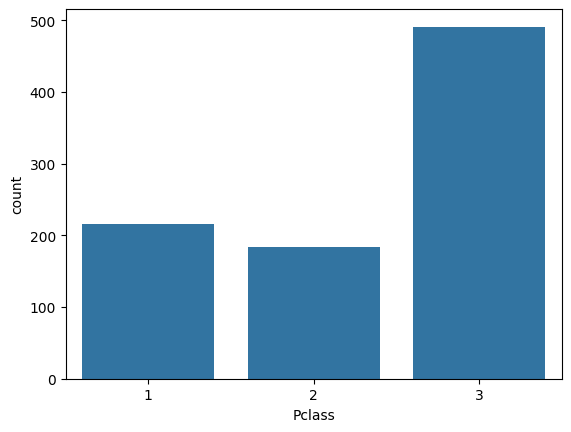

In [6]:
sns.countplot(x='Pclass', data =titanic_df)

<Axes: xlabel='Pclass', ylabel='count'>

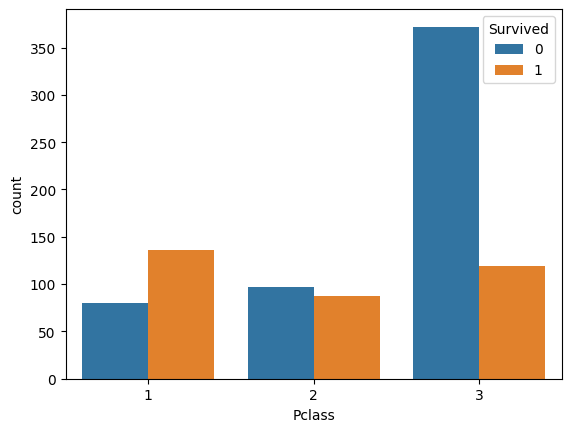

In [7]:
sns.countplot(x='Pclass', hue = 'Survived',data =titanic_df)

<Axes: xlabel='SibSp', ylabel='count'>

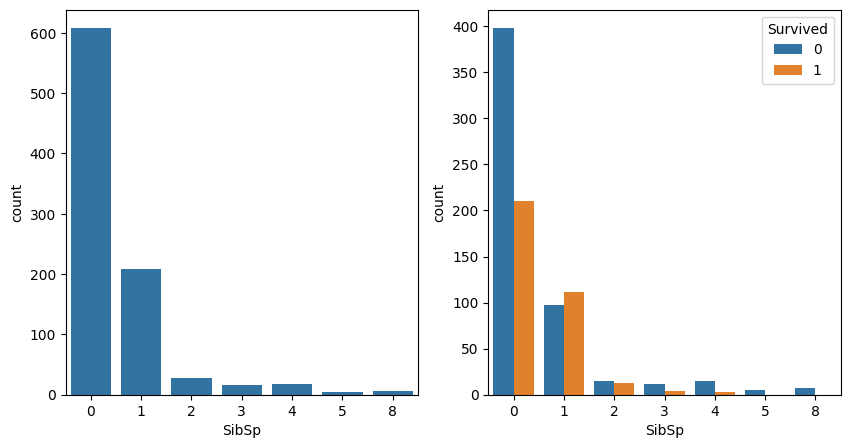

In [16]:
plt.figure(figsize =[10,5])
plt.subplot(121)
sns.countplot(x='SibSp',data =titanic_df)
plt.subplot(122)
sns.countplot(x='SibSp', hue = 'Survived',data =titanic_df)


<Axes: xlabel='Parch', ylabel='count'>

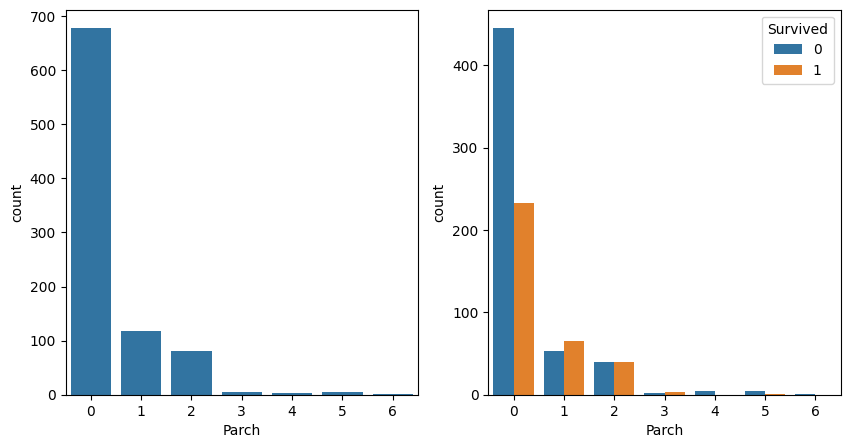

In [17]:
plt.figure(figsize =[10,5])
plt.subplot(121)
sns.countplot(x='Parch',data =titanic_df)
plt.subplot(122)
sns.countplot(x='Parch', hue = 'Survived',data =titanic_df)

<Axes: xlabel='Sex', ylabel='count'>

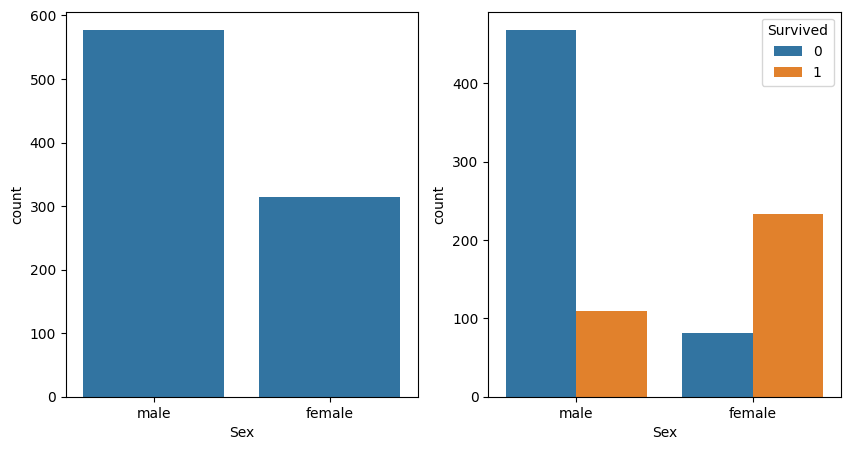

In [19]:
plt.figure(figsize =[10,5])
plt.subplot(121)
sns.countplot(x='Sex',data =titanic_df)
plt.subplot(122)
sns.countplot(x='Sex', hue = 'Survived',data =titanic_df)

<Axes: >

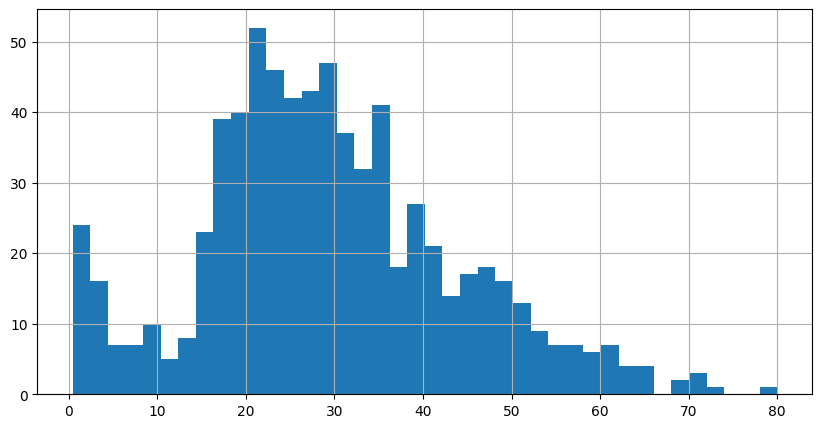

In [20]:
plt.figure(figsize =[10,5])
titanic_df['Age'].hist(bins=40)

<Axes: >

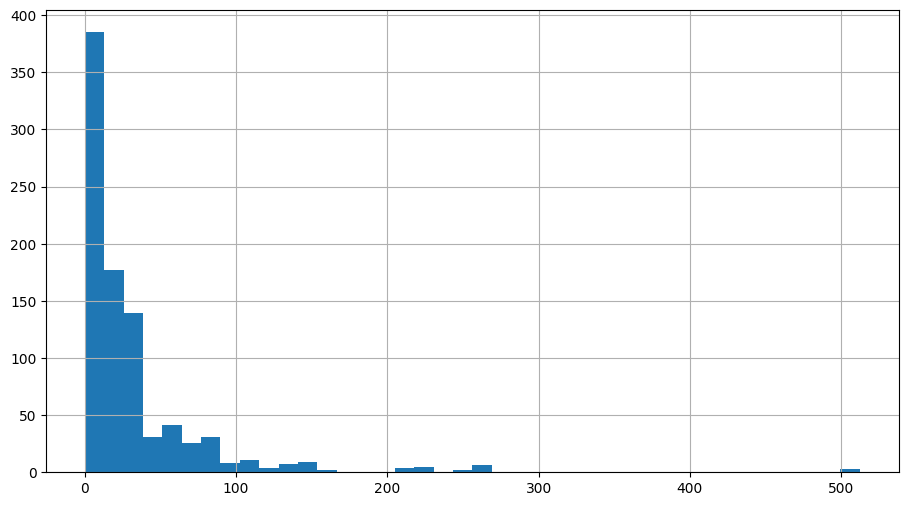

In [21]:
plt.figure(figsize=[11, 6])
titanic_df['Fare'].hist(bins = 40)

<Axes: >

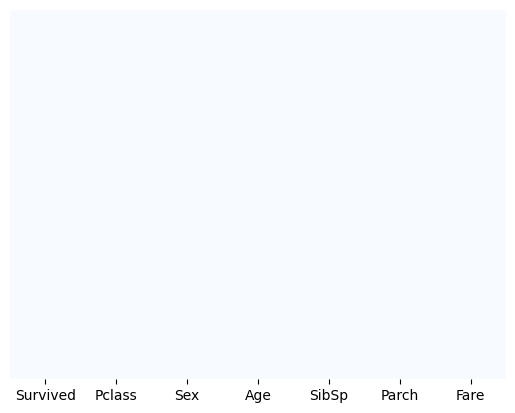

In [30]:
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [23]:
titanic_df.drop('Cabin', axis=1,inplace=True)

In [24]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
titanic_df.drop(['Name', 'Ticket', 'Embarked', 'PassengerId'], axis = 1, inplace = True)

In [26]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


<Axes: xlabel='Sex', ylabel='Age'>

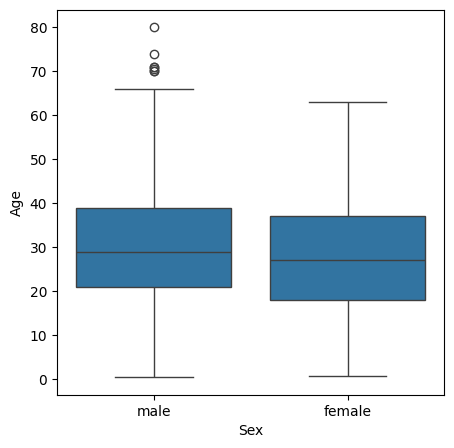

In [27]:
plt.figure(figsize=(5, 5))
sns.boxplot(x = 'Sex', y = 'Age', data = titanic_df)

In [28]:
def Fill_Age(data):
    age = data[0]
    sex = data[1]

    if pd.isnull(age):
        if sex is 'male':
            return 29
        else:
            return 25
    else:
        return age

<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-28-d4cc5d41c935>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if sex is 'male':


In [29]:
titanic_df["Age"] = titanic_df[['Age', 'Sex']].apply(Fill_Age, axis=1)

<Axes: >

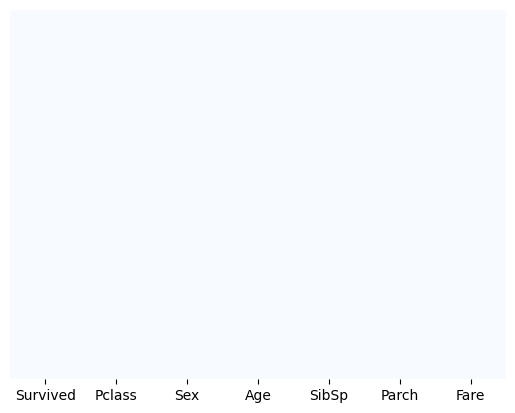

In [31]:
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [32]:
pd.get_dummies(titanic_df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [33]:
male = pd.get_dummies(titanic_df['Sex'], drop_first = True)

In [34]:
titanic_df.drop(['Sex'], axis = 1, inplace = True)

In [35]:
titanic_df = pd.concat([titanic_df, male], axis = 1)

In [36]:
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [38]:
X = titanic_df.drop('Survived', axis = 1).values
y = titanic_df['Survived'].values

print(X)

[[ 3.     22.      1.      0.      7.25    1.    ]
 [ 1.     38.      1.      0.     71.2833  0.    ]
 [ 3.     26.      0.      0.      7.925   0.    ]
 ...
 [ 3.     25.      1.      2.     23.45    0.    ]
 [ 1.     26.      0.      0.     30.      1.    ]
 [ 3.     32.      0.      0.      7.75    1.    ]]


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_predict_test = classifier.predict(X_test)

<Axes: >

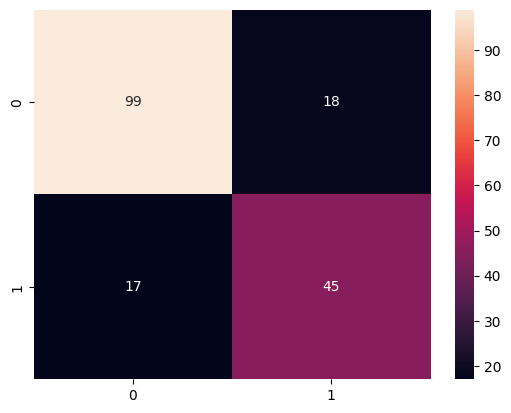

In [43]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True, fmt = "d")